In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import os
import pandas as pd
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

root_dir = "/kaggle/input/leapgestrecog/leapGestRecog"

if not os.path.exists(root_dir):
    print(f"Error: Directory not found at {root_dir}. Please verify the path.")
else:
    print(f"Directory found at {root_dir}.")
    
    print("Contents of the root directory:")
    print(os.listdir(root_dir))

    image_paths = []
    labels = []

    for subject_folder in os.listdir(root_dir):
        subject_path = os.path.join(root_dir, subject_folder)
        if os.path.isdir(subject_path):
            for gesture_folder in os.listdir(subject_path):
                gesture_path = os.path.join(subject_path, gesture_folder)
                if os.path.isdir(gesture_path):
                    for image_file in os.listdir(gesture_path):
                        if image_file.endswith(".jpg"): # Assuming images are JPG
                            image_paths.append(os.path.join(gesture_path, image_file))
                            labels.append(gesture_folder) # Gesture label is the folder name

   
    df = pd.DataFrame({'image_path': image_paths, 'label': labels})

    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    def load_and_preprocess_image(image_path):
        img = cv2.imread(image_path)
        if img is None:
            return None 
        img = cv2.resize(img, target_size)
        img = img / 255.0  
        return img

    df['processed_image'] = df['image_path'].apply(load_and_preprocess_image)

    df.dropna(subset=['processed_image'], inplace=True)

    label_encoder = LabelEncoder()
    df['label_encoded'] = label_encoder.fit_transform(df['label'])

    display(df.head())

Directory found at /kaggle/input/leapgestrecog/leapGestRecog.
Contents of the root directory:
['07', '05', '06', '02', '04', '00', '08', '09', '03', '01']


,image_path,label,processed_image,label_encoded


In [13]:
# Inspect the contents of one of the subject folders to understand the structure
subject_folders = [f for f in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, f))]
if subject_folders:
    first_subject_folder = subject_folders[0]
    first_subject_path = os.path.join(root_dir, first_subject_folder)
    print(f"\nContents of the first subject folder ({first_subject_folder}):")
    print(os.listdir(first_subject_path))

    # Inspect the contents of one of the gesture folders within that subject folder
    gesture_folders = [f for f in os.listdir(first_subject_path) if os.path.isdir(os.path.join(first_subject_path, f))]
    if gesture_folders:
        first_gesture_folder = gesture_folders[0]
        first_gesture_path = os.path.join(first_subject_path, first_gesture_folder)
        print(f"\nContents of the first gesture folder ({first_gesture_folder}) in subject {first_subject_folder}:")
        print(os.listdir(first_gesture_path))


Contents of the first subject folder (07):
['02_l', '04_fist_moved', '09_c', '10_down', '06_index', '08_palm_moved', '07_ok', '05_thumb', '01_palm', '03_fist']

Contents of the first gesture folder (02_l) in subject 07:
['frame_07_02_0067.png', 'frame_07_02_0153.png', 'frame_07_02_0105.png', 'frame_07_02_0018.png', 'frame_07_02_0050.png', 'frame_07_02_0029.png', 'frame_07_02_0195.png', 'frame_07_02_0051.png', 'frame_07_02_0074.png', 'frame_07_02_0142.png', 'frame_07_02_0149.png', 'frame_07_02_0121.png', 'frame_07_02_0194.png', 'frame_07_02_0003.png', 'frame_07_02_0025.png', 'frame_07_02_0101.png', 'frame_07_02_0111.png', 'frame_07_02_0118.png', 'frame_07_02_0091.png', 'frame_07_02_0026.png', 'frame_07_02_0097.png', 'frame_07_02_0150.png', 'frame_07_02_0057.png', 'frame_07_02_0193.png', 'frame_07_02_0117.png', 'frame_07_02_0016.png', 'frame_07_02_0130.png', 'frame_07_02_0056.png', 'frame_07_02_0127.png', 'frame_07_02_0024.png', 'frame_07_02_0176.png', 'frame_07_02_0002.png', 'frame_07_

In [14]:
image_paths = []
labels = []
for subject_folder in os.listdir(root_dir):
    subject_path = os.path.join(root_dir, subject_folder)
    if os.path.isdir(subject_path):
        for gesture_folder in os.listdir(subject_path):
            gesture_path = os.path.join(subject_path, gesture_folder)
            if os.path.isdir(gesture_path):
                for image_file in os.listdir(gesture_path):
                    if image_file.endswith(".png"): 
                        image_paths.append(os.path.join(gesture_path, image_file))
                        labels.append(gesture_folder)
df = pd.DataFrame({'image_path': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df['processed_image'] = df['image_path'].apply(load_and_preprocess_image)
df.dropna(subset=['processed_image'], inplace=True)
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])
display(df.head())

,image_path,label,processed_image,label_encoded
0,/kaggle/input/leapgestrecog/leapGestRecog/00/1...,10_down,"[[[0.01568627450980392, 0.01568627450980392, 0...",9
1,/kaggle/input/leapgestrecog/leapGestRecog/05/0...,02_l,"[[[0.0196078431372549, 0.0196078431372549, 0.0...",1
2,/kaggle/input/leapgestrecog/leapGestRecog/04/1...,10_down,"[[[0.0196078431372549, 0.0196078431372549, 0.0...",9
3,/kaggle/input/leapgestrecog/leapGestRecog/07/0...,08_palm_moved,"[[[0.0196078431372549, 0.0196078431372549, 0.0...",7
4,/kaggle/input/leapgestrecog/leapGestRecog/08/0...,03_fist,"[[[0.027450980392156862, 0.027450980392156862,...",2


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [19]:
num_classes = df['label_encoded'].nunique()
img_shape = df['processed_image'].iloc[0].shape
input_shape = img_shape
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-28 18:25:58.491903: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 684,490 (2.61 MB)

 Trainable params: 684,490 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from sklearn.model_selection import train_test_split
X = np.stack(df['processed_image'].values)
y = df['label_encoded'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
print("✅ Model training complete.")

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 72s 138ms/step - accuracy: 0.8075 - loss: 0.5748 - val_accuracy: 0.9990 - val_loss: 0.0022
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 63s 127ms/step - accuracy: 0.9968 - loss: 0.0108 - val_accuracy: 0.9995 - val_loss: 0.0025
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.9999 - loss: 6.0900e-04 - val_accuracy: 0.9987 - val_loss: 0.0042
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 60s 120ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9970 - val_loss: 0.0084
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.9963 - loss: 0.0119 - val_accuracy: 0.9905 - val_loss: 0.0375
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 62s 124ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9987 - val_loss: 0.0048
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 60s 121ms/step - accuracy: 0.9993 - loss: 0.0025 - val_accuracy: 0.9998 - val_loss: 5.7452e-04
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 121ms/step - accuracy: 0.9997 -

In [21]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Loss: 0.0003
Validation Accuracy: 1.0000


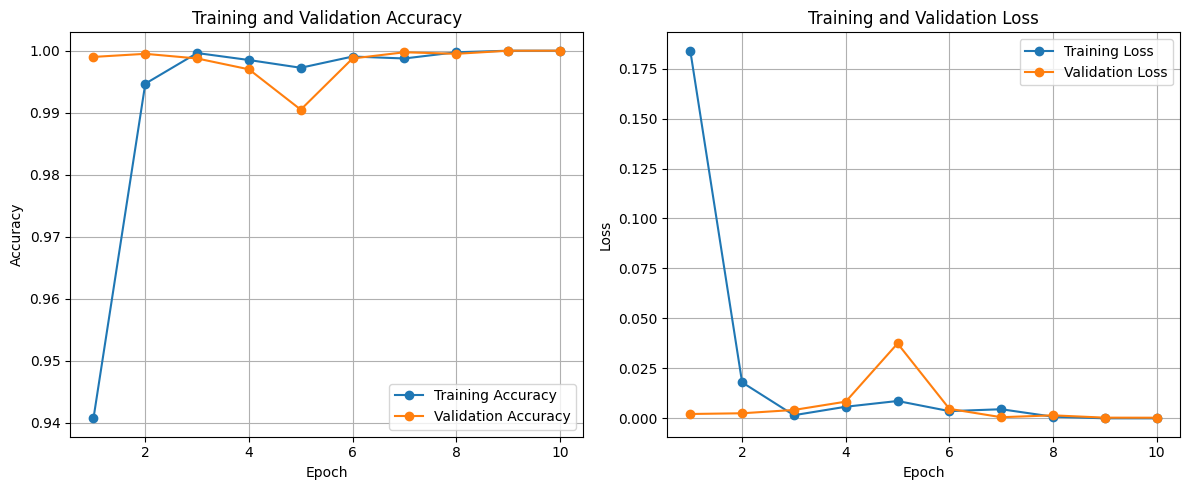

In [22]:
import matplotlib.pyplot as plt

# Extract values from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create epochs range
epochs_range = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



## 📈 **Training and Validation Curves Explanation**

### Accuracy Curve

- The **training accuracy** steadily increases and quickly approaches 100% after a few epochs.
- The **validation accuracy** also remains consistently high (near 99–100%) throughout training.
- The close match between training and validation accuracy suggests that the model is not overfitting and is generalizing well to unseen data.

### Loss Curve

- The **training loss** drops sharply in the first few epochs, indicating that the model is learning effectively.
- The **validation loss** is consistently low and remains close to the training loss, which supports the observation that the model is not overfitting.
- The small spikes in validation loss (around epochs 4–5) could be due to slight variations in the validation set, but they stabilize quickly.

### Overall Conclusion

These curves indicate that the model has learned the hand gesture recognition task very effectively. The high and stable validation accuracy shows strong generalization capability, while the low loss confirms good convergence.

In [29]:
# Define the path in /kaggle/working/
model_save_path = "/kaggle/working/hand_gesture_model.h5"

# Save the model
model.save(model_save_path)

print(f"✅ Model saved to {model_save_path}. You will find it in the 'Output' section after you finish running the notebook.")


✅ Model saved to /kaggle/working/hand_gesture_model.h5. You will find it in the 'Output' section after you finish running the notebook.
